In [153]:
import pandas as pnd
import seaborn as sns
import matplotlib as plt
%matplotlib inline

In [154]:
answers_train = pnd.read_csv("answers_train.csv",index_col=0,header=None)
answers_train.columns = ["answers"]
test = pnd.read_csv("test.csv")
train = pnd.read_csv("train.csv")

In [155]:
train_with_y = train
train_with_y["answer"] = answers_train.answers

In [156]:
train.head()

,price,lunch,obj_rayon,n_seats,is_net,type,sumareaLive,sumareaComm,meanareaLive,meanareaComm,...,Школа искусств_300m,Школа танцев_300m,Экспертиза_300m,Электромонтажные работы_300m,Электротехническая продукция_300m,Ювелирная мастерская_300m,Ювелирный магазин_300m,Юридические услуги_300m,прочее_300m,answer
0,250,-1.0,7,210,1,4,122006,466864,334,1279,...,0,2,0,1,0,0,1,9,0,100
1,1500,250.0,5,60,0,5,361055,753622,898,1875,...,1,1,0,1,0,3,0,8,1,52
2,2000,180.0,2,80,1,1,345612,656674,817,1552,...,1,1,1,0,1,2,2,18,1,31
3,1000,-1.0,4,73,0,1,96250,639870,285,1893,...,0,2,4,1,1,1,0,10,1,58
4,1500,350.0,5,78,0,5,247240,810187,529,1735,...,0,0,0,0,0,0,1,5,4,38


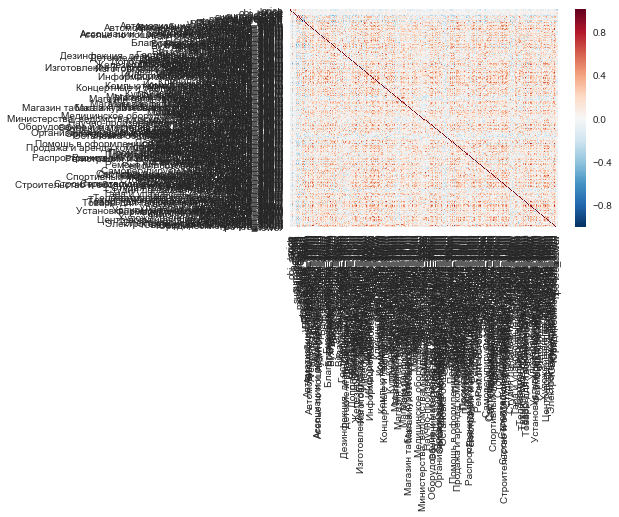

In [157]:
train_only_y = train
train_only_y["answer"] = answers_train.answers
fig = plt.figure.Figure(figsize=(10,10))
picture = sns.heatmap(train_with_y.corr())

In [158]:
matrix = train_with_y.corr()
leng = len(matrix_df)
matrix_df = pnd.DataFrame(matrix)
matrix_df["ref_column"] = matrix_df.index
matrix_df["indexes"] = range(leng)
matrix_df = matrix_df.set_index("indexes")
matrix_df.head()

,price,lunch,obj_rayon,n_seats,is_net,type,sumareaLive,sumareaComm,meanareaLive,meanareaComm,...,Школа танцев_300m,Экспертиза_300m,Электромонтажные работы_300m,Электротехническая продукция_300m,Ювелирная мастерская_300m,Ювелирный магазин_300m,Юридические услуги_300m,прочее_300m,answer,ref_column
indexes,,,,,,,,,,,,,,,,,,,,,
0,1.000000,0.135683,0.032314,0.221899,-0.232055,0.383605,0.117389,-0.027272,0.097834,0.014913,...,-0.138623,-0.094239,0.047718,-0.048510,-0.047487,0.085808,-0.129778,-0.092938,-0.278831,price
1,0.135683,1.000000,-0.107784,0.105510,-0.046169,0.053109,-0.009617,0.050488,0.060355,0.071626,...,-0.068464,0.043116,-0.007119,-0.012761,-0.023002,-0.096227,0.030291,0.052254,0.003078,lunch
2,0.032314,-0.107784,1.000000,0.131349,-0.060102,0.113511,-0.124220,-0.209533,0.123158,0.134253,...,-0.162728,-0.181094,0.029223,-0.041750,0.067270,0.047215,-0.269537,0.102335,0.190536,obj_rayon
3,0.221899,0.105510,0.131349,1.000000,0.096600,0.329055,-0.062082,0.088107,-0.029448,0.101515,...,-0.040832,0.029370,0.120946,0.008587,-0.029186,0.026657,0.003571,0.023038,0.092521,n_seats
4,-0.232055,-0.046169,-0.060102,0.096600,1.000000,-0.022958,-0.044344,0.070386,-0.061452,-0.000883,...,0.045764,0.088086,0.040668,0.068295,0.131314,0.022775,0.064518,0.051302,0.281124,is_net


In [159]:
for i in range(len(answers_corr)):
    if ((abs(answers_corr[i])>0.2)):
        print("Больше 0.2: {0}".format(matrix_df.columns[i]))

Больше 0.2: price
Больше 0.2: is_net
Больше 0.2: dist_to_metro
Больше 0.2: Быстрое питание_300m
Больше 0.2: Велопарковка_300m
Больше 0.2: Курсы и мастер-классы_300m
Больше 0.2: answer


In [160]:
train = train_with_y.drop(["maxareaComm","places_near_300m","meanareaLive","answer"],axis=1)

In [161]:
#Хорошее преобразование
train_with_y = train_with_y[["price","lunch","n_seats","is_net","type","obj_rayon","sumareaLive", "meanareaLive",
                             "maxareaLive","sumareaComm","meanareaComm", "maxareaComm","places_near_300m",
                             "metro_near_500m","dist_to_metro",
                             "Быстрое питание_300m","Велопарковка_300m","Курсы и мастер-классы_300m"]]

In [173]:
train = train_with_y
for i in train.columns:
    train[i] = train[i].replace(-1.0,train[i].mean())
train.head()

,price,lunch,n_seats,is_net,type,obj_rayon,sumareaLive,meanareaLive,maxareaLive,sumareaComm,meanareaComm,maxareaComm,places_near_300m,metro_near_500m,dist_to_metro,Быстрое питание_300m,Велопарковка_300m,Курсы и мастер-классы_300m
0,250,160.539936,210,1,4,7,122006,334,9430,466864,1279,33421,26,3,37.030323,2,1,0
1,1500,250.000000,60,0,5,5,361055,898,14005,753622,1875,51076,17,1,323.755908,0,0,1
2,2000,180.000000,80,1,1,2,345612,817,21542,656674,1552,84261,20,2,149.739282,0,0,1
3,1000,160.539936,73,0,1,4,96250,285,15042,639870,1893,42111,17,2,76.481528,7,0,1
4,1500,350.000000,78,0,5,5,247240,529,21447,810187,1735,84261,16,2,190.112121,6,2,0


In [174]:
from sklearn.cross_validation import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(train, answers_train, test_size = 0.4)

In [186]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

linear_model = LinearRegression()
linear_model.fit(X_train,y_train)
random_model = RandomForestRegressor(criterion="mae",max_depth=2,n_estimators=100000)
random_model.fit(X_train,y_train)
gradient_model = GradientBoostingRegressor(max_depth=2,n_estimators=10000,learning_rate=0.001,random_state=12345)
gradient_model.fit(X_train,y_train)
print("done")

done


In [187]:
from sklearn.metrics import mean_absolute_error
y_predict_linear = linear_model.predict(X_test)
print("linear {0}".format(mean_absolute_error(y_test.answers,y_predict_linear)))
from sklearn.metrics import mean_absolute_error
y_predict_random = random_model.predict(X_test)
print("random forest {0}".format(mean_absolute_error(y_test.answers,y_predict_random)))
from sklearn.metrics import mean_absolute_error
y_predict_gradient = gradient_model.predict(X_test)
print("gradient boosting {0}".format(mean_absolute_error(y_test.answers,y_predict_gradient)))

linear 18.760588382449626
random forest 19.025229960317454
gradient boosting 18.768279763779454


In [194]:
final_model = random_model

In [195]:
X_train.head()

,price,lunch,n_seats,is_net,type,obj_rayon,sumareaLive,meanareaLive,maxareaLive,sumareaComm,meanareaComm,maxareaComm,places_near_300m,metro_near_500m,dist_to_metro,Быстрое питание_300m,Велопарковка_300m,Курсы и мастер-классы_300m
67,2300,160.539936,49,0,5,3,425059,938,11796,512788,1132,19755,25,0,611.090765,0,0,1
29,360,160.539936,41,0,1,5,313154,793,14005,840247,2127,51076,24,3,79.163078,3,0,3
88,1250,330.000000,75,0,1,3,223552,537,13187,996254,2395,65547,16,0,506.660231,1,0,0
130,600,390.000000,35,0,5,5,256986,718,21542,566387,1582,36522,17,2,192.220444,3,2,0
119,250,160.539936,35,1,1,1,316726,692,12682,758944,1657,46786,17,2,306.303710,1,0,1


In [198]:
test = test[["price","lunch","n_seats","is_net","type","obj_rayon","sumareaLive", "meanareaLive",
                             "maxareaLive","sumareaComm","meanareaComm", "maxareaComm","places_near_300m",
                             "metro_near_500m","dist_to_metro",
                             "Быстрое питание_300m","Велопарковка_300m","Курсы и мастер-классы_300m"]]

In [199]:
predicted = final_model.predict(test)
sample = pnd.read_csv("answers_sample.csv")
sample = sample.set_index(sample.id)

In [200]:
sample["answer"] = predicted
sample = sample.drop("id",axis = 1)
sample.head()

,answer
id,
313,14.430280
314,15.737305
315,44.848455
316,16.453330
317,14.101530


In [201]:
sample.to_csv("new.csv")